# Import Libraries

In [1]:
import os
from pathlib import Path
import numpy as np
import json
import random
import matplotlib.pyplot as plt

from DatasetInterface import MSCOCOInterface
from pathlib import Path

In [2]:
# load vocab
with open('vocabulary/idx_to_string.json') as json_file:
    idx_to_string_json = json.load(json_file)
        
idx_to_string = dict()
for key in idx_to_string_json:
    idx_to_string[int(key)] = idx_to_string_json[key]
    
with open('vocabulary/string_to_index.json') as json_file:
    string_to_index = json.load(json_file)
    
root = Path('Data')
#imgs_path = root/'images'/'train2017'
imgs_path = root/'train2017'
#captions_path = root/'annotations'/'captions_train2017.json'
captions_path = root/'annotations_trainval2017'/'annotations'/'captions_train2017.json'

## Training

In [3]:
interface_params = {
    'imgs_path': imgs_path,
    'captions_path': captions_path,
    'freq_threshold': 1,
    'sequence_length': 20,
    'caps_per_img': 1,
    'stage': "train",
    'idx_to_string': idx_to_string,
    'string_to_index': string_to_index,
    'seed': 706
}

coco_interface_train = MSCOCOInterface(**interface_params)

print(f"Lenght: {len(coco_interface_train)}")

Lenght: 15000


In [4]:
len(coco_interface_train.images)

15000

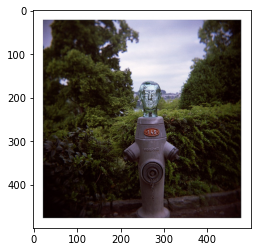

<SOS> a gray fire hydrant sitting next to a green hedge <EOS> 


In [5]:
#idx = random.randint(0, len(coco_interface_train.images))
idx = 0
coco_interface_train.display_img_with_captions(idx)
for cap_idx in range(coco_interface_train.caps_per_img):
    
    cap = ''
    idx, X, y = coco_interface_train[idx]
    for word_idx in y:
        if word_idx != 0:
            cap += coco_interface_train.idx_to_string[word_idx.item()] + ' '
    idx += 1
    print(cap)

## Validation

In [6]:
interface_params = {
    'imgs_path': imgs_path,
    'captions_path': captions_path,
    'freq_threshold': 1,
    'sequence_length': 20,
    'caps_per_img': 1,
    'stage': "validation",
    'idx_to_string': idx_to_string,
    'string_to_index': string_to_index,
    'seed': 706
}

coco_interface_val = MSCOCOInterface(**interface_params)

print(f"Lenght: {len(coco_interface_val)}")

Lenght: 5000


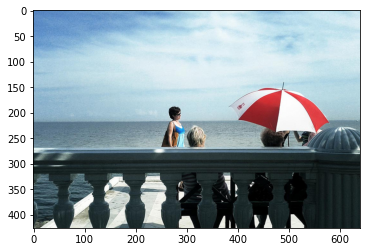

<SOS> people enjoying the ocean view from the pier <EOS> 


In [7]:
#idx = random.randint(0, len(coco_interface_val.coco.images))
idx = 0
coco_interface_val.display_img_with_captions(idx)
for cap_idx in range(coco_interface_val.caps_per_img):
    
    cap = ''
    idx, X, y = coco_interface_val[idx]
    for word_idx in y:
        if word_idx != 0:
            cap += coco_interface_val.idx_to_string[word_idx.item()] + ' '
    idx += 1
    print(cap)

## Testing

In [8]:
interface_params = {
    'imgs_path': imgs_path,
    'captions_path': captions_path,
    'freq_threshold': 1,
    'sequence_length': 20,
    'caps_per_img': 1,
    'stage': "test",
    'idx_to_string': idx_to_string,
    'string_to_index': string_to_index,
    'seed': 706
}

coco_interface_test = MSCOCOInterface(**interface_params)

print(f"Lenght: {len(coco_interface_test)}")

Lenght: 5000


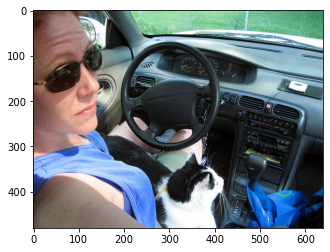

<SOS> a woman driving a car while holding a cat on her lap <EOS> 


In [9]:
#idx = random.randint(0, len(coco_interface_test.coco.images))
idx = 0
coco_interface_test.display_img_with_captions(idx)
for cap_idx in range(coco_interface_test.caps_per_img):
    
    cap = ''
    idx, X, y = coco_interface_test[idx]
    for word_idx in y:
        if word_idx != 0:
            cap += coco_interface_test.idx_to_string[word_idx.item()] + ' '
    idx += 1
    print(cap)

In [10]:
#%%time
#coco_interface.idx_to_string = None
#coco_interface.string_to_index = None
#coco_interface_val.vocabulary.build_vocab2(coco_interface_val.coco.captions_to_list())